# **stage 3** - 데이터 시각화 및 전처리



## 데이터 추출
범주형과 문자형으로 된 데이터들을 추출하고 인코딩하여 데이터를 수치화 하자.

여기서 인코딩이란?

컴퓨터가 인식하기 어려운 문자형데이터를 수치화 하여 읽기 쉽게끔 하는 작업이다.



In [ ]:
categorical_data=air[["Gender", "Customer Type", "Type of Travel", "Class"]]
df_gender=categorical_data[["Gender"]]
df_customer=categorical_data[["Customer Type"]]
df_travel=categorical_data[["Type of Travel"]]
df_class=categorical_data[["class"]]

우리 air 데이터에는 총4개의 범주형 데이터가 있다.
4개의 column을 추출하여
각각 df_dender, df_customer, df_travel, df_class 라는 column들을 뽑아내자.

이제 우리는 뽑아낸 데이터를 가공(encoding)해보자.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(df_gender)

le_encoded=le.transform(df_gender)
new_gender=pd.DataFrame(le_encoded, columns=['gender'])

new_gender

데이터를 불러오고 어떤 feature이 있는지 살펴보자

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/')
# '/content/drive/MyDrive/Colab Notebooks/ ← 여기 경로까지는 본인의 경로 입력, part3_lecture_fastcampus/chapter02' ← 변경X
os.getcwd()

In [1]:
import numpy as np
import pandas as pd
df_train = pd.read_csv('/content/train.csv')

In [2]:
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,...,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


기초 통계량을 살펴봅시다

In [3]:
df_train.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,866.169729,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,1.000000,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,750.750000,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1500.500000,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,2250.250000,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,3000.000000,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


In [4]:
df_train['target'].value_counts()

1    1668
0    1332
Name: target, dtype: int64

1668/(1668+1332)
약 56퍼센트의 고객이 만족

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

정보들을 확인해줍니다

# 데이터 시각화

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

In [7]:
categoical_list=[]
numeric_list = []
for i in df_train.columns:
  if df[i].dtypes == 'O':
    categoical_list.append(i)
  else:
    numeric_list.append(i)

In [8]:
print(categoical_list)
print(numeric_list)


numeric_list_a =['id','Age','Flight Distance','Arrival Delay in Minutes','Departure Delay in Minutes']
numeric_list_b = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding','target']

['Gender', 'Customer Type', 'Type of Travel', 'Class']
['id', 'Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target']


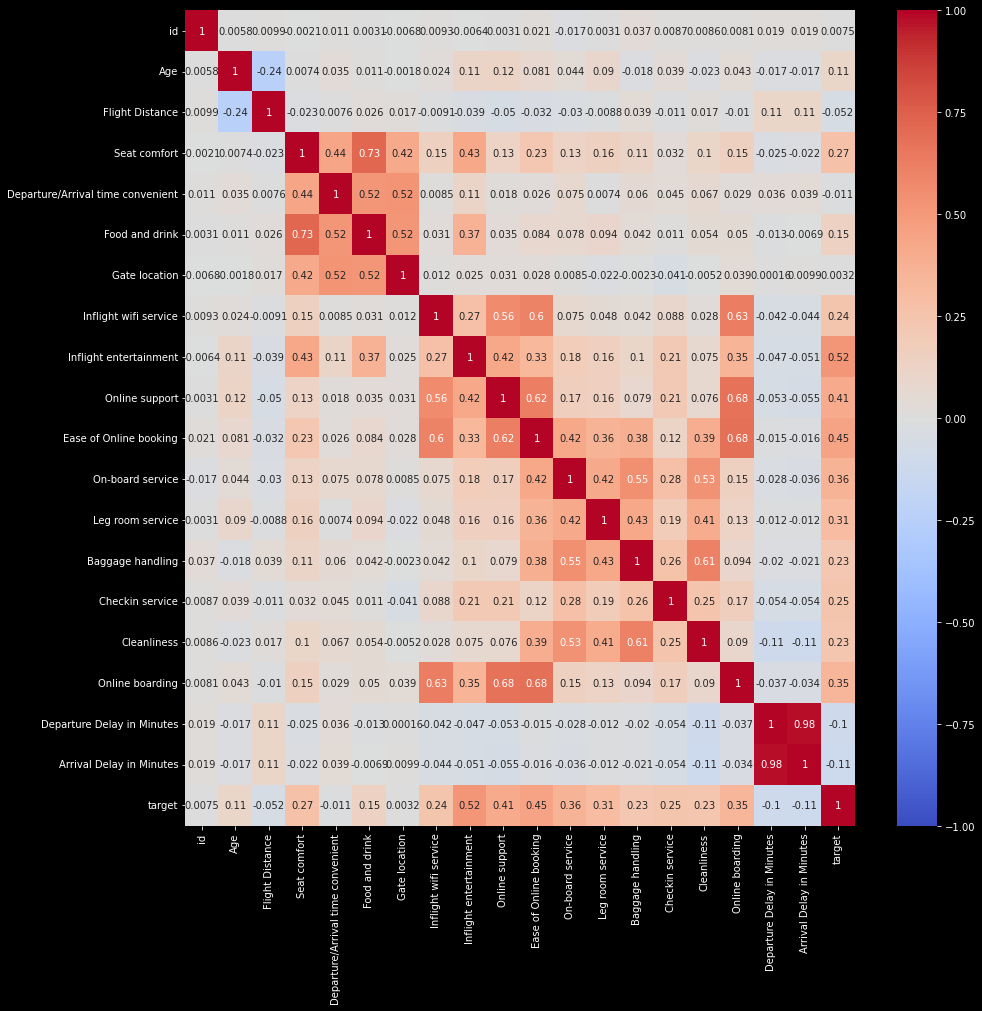

In [9]:
sns.heatmap(df.corr(), vmax = +1, vmin = -1, annot=True, cmap='coolwarm')
plt.gcf().set_size_inches(15,15)

In [10]:
df_corr = df_train[numeric_list_b].corr()

In [11]:
df_corr.loc[df_corr["target"]>0.3 ,"target"]

Inflight entertainment    0.522935
Online support            0.411944
Ease of Online booking    0.447784
On-board service          0.359699
Leg room service          0.311086
Online boarding           0.351370
target                    1.000000
Name: target, dtype: float64

In [12]:
df_corr.loc[df_corr["target"]<-0.3 ,"target"]

Series([], Name: target, dtype: float64)

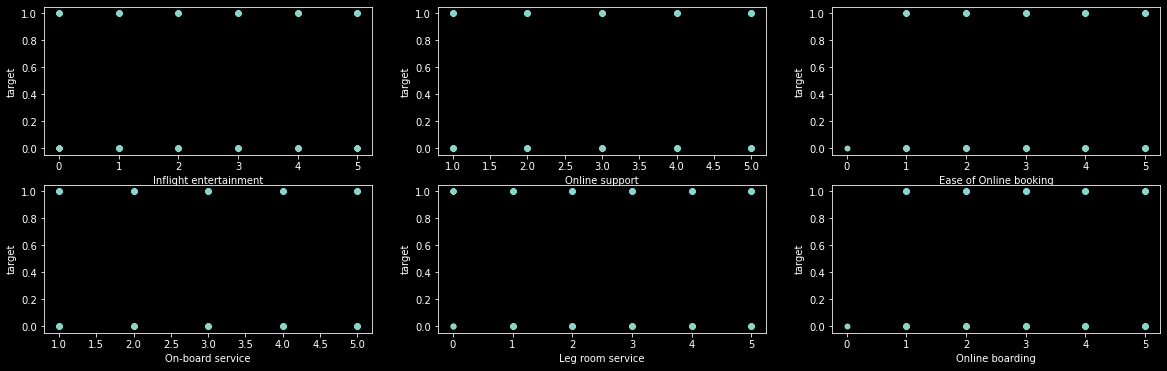

In [13]:
fig, axes = plt.subplots(2,3)
sns.scatterplot(x=df_train['Inflight entertainment'], y=df_train['target'],linewidth=0,ax=axes[0,0]);
sns.scatterplot(x=df_train['Online support'] , y=df_train['target'],linewidth=0,ax=axes[0,1]);
sns.scatterplot(x=df_train['Ease of Online booking'] , y=df_train['target'],linewidth=0,ax=axes[0,2]);
sns.scatterplot(x=df_train['On-board service'] , y=df_train['target'],linewidth=0,ax=axes[1,0]);
sns.scatterplot(x=df_train['Leg room service'] , y=df_train['target'],linewidth=0,ax=axes[1,1]);
sns.scatterplot(x=df_train['Online boarding'] , y=df_train['target'],linewidth=0,ax=axes[1,2]);
plt.gcf().set_size_inches(20,6)

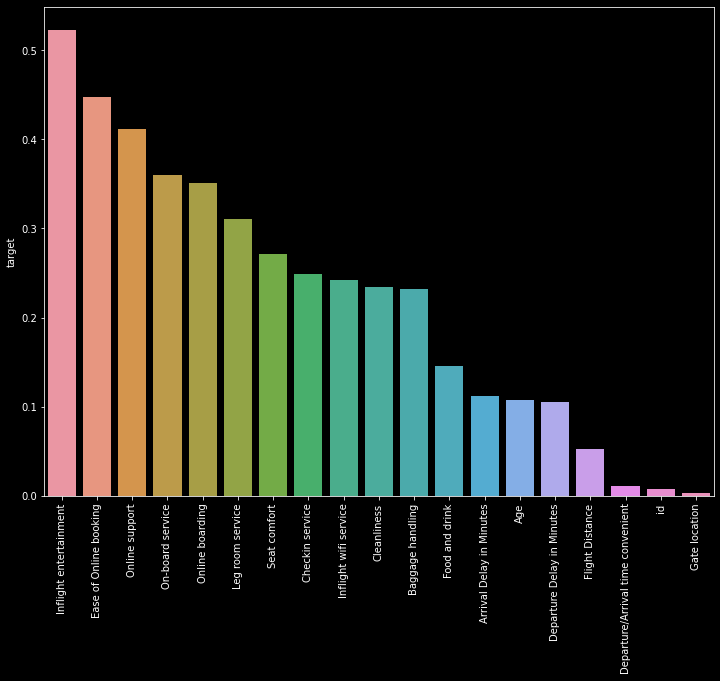

In [14]:
plt.figure(figsize=(12,9)) # 사이즈 변경
plt.xticks(rotation = 90) # x축 text 회전
sns.barplot(x = abs(df.corr()["target"]).sort_values(ascending = False)[1:].index ,
            y = abs(df.corr()["target"]).sort_values(ascending = False)[1:]) # target을 제외하고 나머지와의 상관관계 시각화

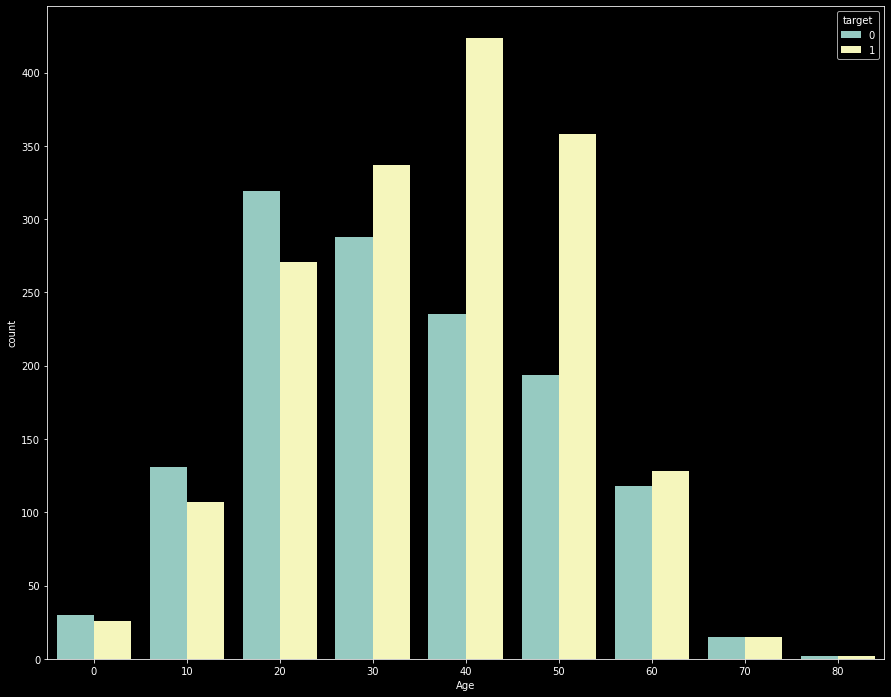

In [15]:
plt.figure(figsize=(15,12))
sns.countplot(data=df_train, x=df_train['Age']//10*10,hue='target')

30대 이상상부터 만족을 답한 경우가 많다 30살을 기준으로 상관관계를 뽑아보자

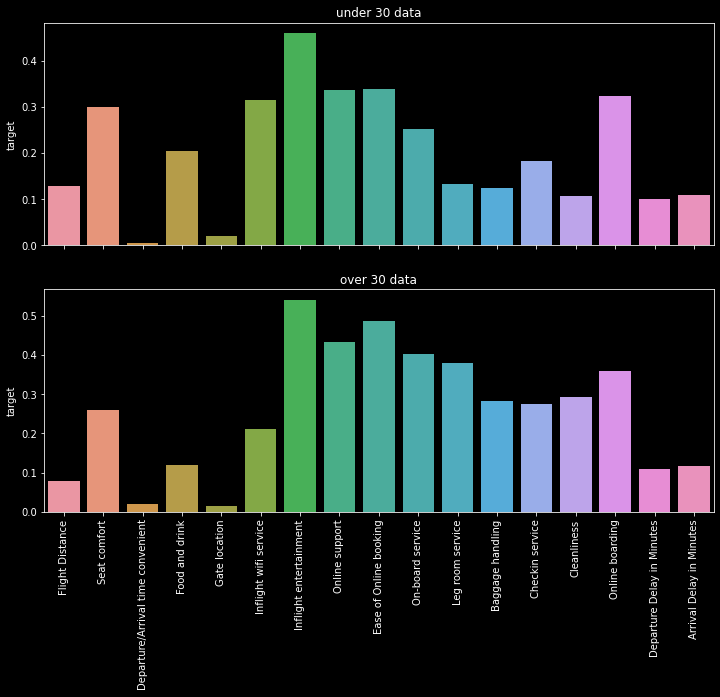

In [16]:
fig, ax = plt.subplots(2,1,figsize=(12,9))
plt.xticks(rotation =90) # x축 텍스트 회전

under_30 = sns.barplot(x=abs(df_train[df_train['Age']<30].corr()['target']).drop(['target','id','Age']).index ,
                       y=abs(df_train[df_train['Age']<30].corr()['target']).drop(['target','id','Age']),ax=ax[0])
under_30.set(xticklabels=[])
under_30.set(title='under 30 data')
over_30 = sns.barplot(x=abs(df_train[df_train['Age']>=30].corr()['target']).drop(['target','id','Age']).index,
                      y=abs(df_train[df_train['Age']>=30].corr()['target']).drop(['target','id','Age']), ax=ax[1])

over_30.set(title='over 30 data')

plt.show();

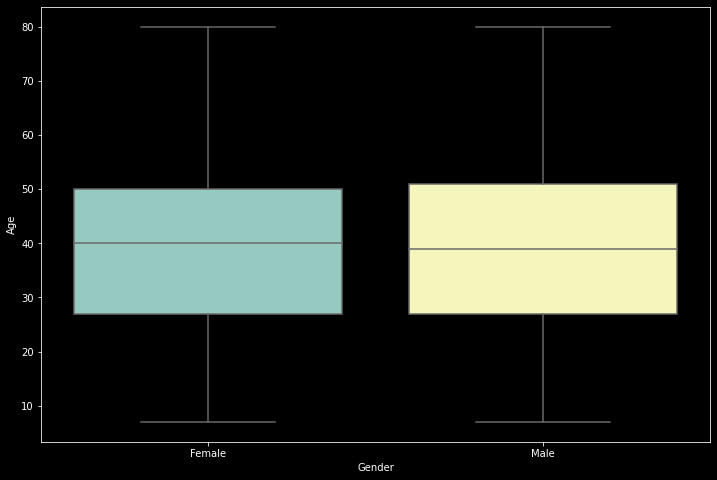

In [17]:
#나이에 대한 이상치
plt.figure(figsize=(12,8))
sns.boxplot(data=df_train,x='Gender',y='Age')

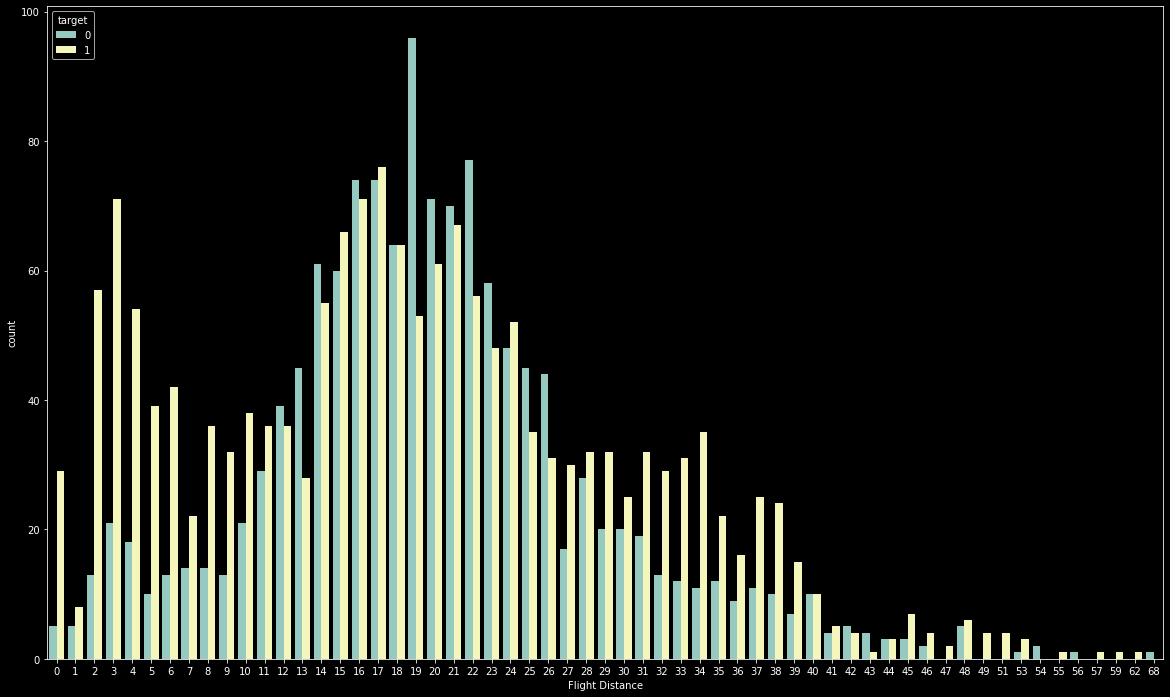

In [18]:
#flight Distance의 분포
#flight Distance별 target
plt.figure(figsize=(20,12))
sns.countplot(data=df_train,x=df_train['Flight Distance']//100,hue='target')
#12~26이 만족을 안한 경우가 많음

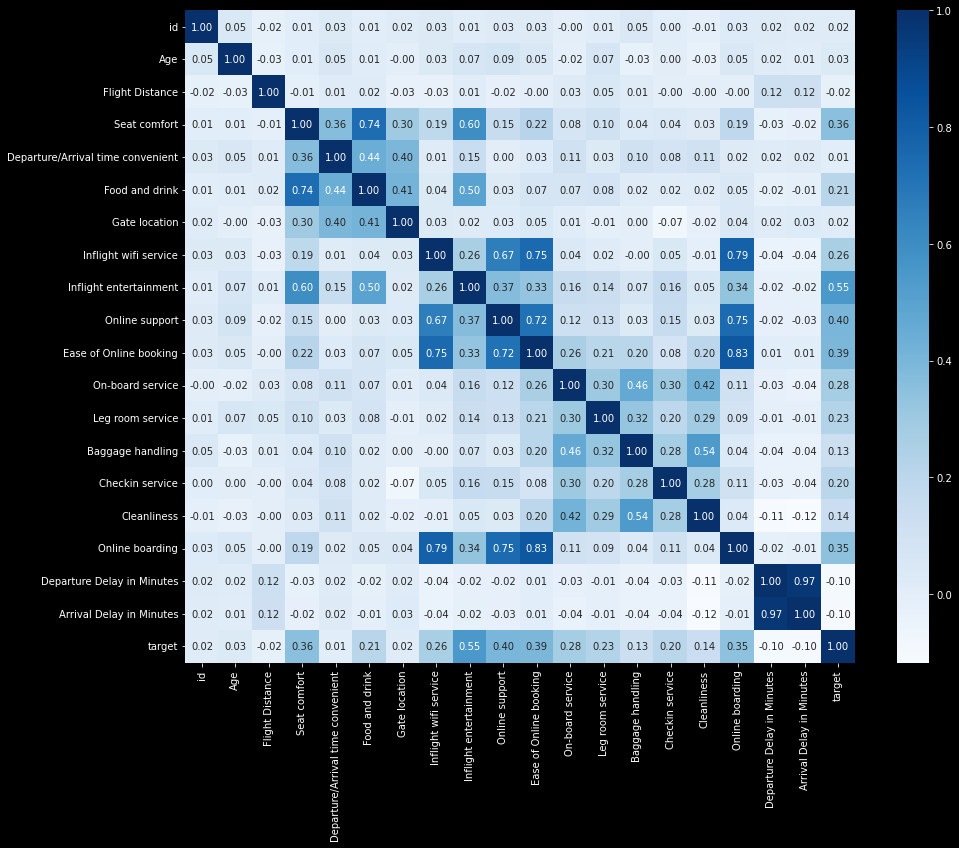

In [19]:
plt.figure(figsize=(15,12))
sns.heatmap(df_train[(df_train['Flight Distance'] > 1200) & (df_train['Flight Distance'] <= 2699)].corr() , annot=True,cmap='Blues',fmt='.2f')

이제 다음 스테이지에서는 알고리즘을 선택하여 모델링하는 작업을 해보겠습니다